In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import minimize
import sys
import os

In [26]:
sys.path.append(os.path.abspath('../scripts'))

In [27]:
from analysis_and_modeling import *

In [28]:
data = pd.read_csv('../Data/cleaned_data.csv', parse_dates=['Date'], index_col='Date')

In [29]:
data.head()

,BND,SPY,TSLA
Date,,,
2015-01-02 00:00:00+00:00,63.358761,173.173798,14.620667
2015-01-05 00:00:00+00:00,63.542736,170.046310,14.006000
2015-01-06 00:00:00+00:00,63.726738,168.444687,14.085333
2015-01-07 00:00:00+00:00,63.765057,170.543625,14.063333
2015-01-08 00:00:00+00:00,63.665409,173.569977,14.041333


In [30]:
tsla_data = data['TSLA']
bnd_data = data['BND']
spy_data = data['SPY']

In [31]:
tsla_data_diff = tsla_data.diff().dropna()
bnd_data_diff = bnd_data.diff().dropna()
spy_data_diff = spy_data.diff().dropna()

In [32]:
assess_stationarity(tsla_data_diff) 
assess_stationarity(bnd_data_diff)
assess_stationarity(spy_data_diff)

ADF Statistic: -10.088201009165402
p-value: 1.1404778247005846e-17
Critical Values:
 1%: -3.4330273737125445
 5%: -2.8627228377894505
 10%: -2.567399672341618
The series is likely stationary.
ADF Statistic: -9.742506775683319
p-value: 8.422338947522184e-17
Critical Values:
 1%: -3.4330229961087557
 5%: -2.8627209046733073
 10%: -2.5673986431191405
The series is likely stationary.
ADF Statistic: -10.16994949451398
p-value: 7.133120840055442e-18
Critical Values:
 1%: -3.433026277967909
 5%: -2.862722353917318
 10%: -2.56739941472018
The series is likely stationary.


In [33]:
tsla_data_diff.index = pd.to_datetime(tsla_data_diff.index)
bnd_data_diff.index = pd.to_datetime(bnd_data_diff.index)
spy_data_diff.index = pd.to_datetime(spy_data_diff.index)

In [34]:
tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')
bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')

C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_3696\1037180378.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  tsla_data_diff = tsla_data_diff.asfreq('D').fillna(method='ffill')
C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_3696\1037180378.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bnd_data_diff = bnd_data_diff.asfreq('D').fillna(method='ffill')
C:\Users\Abdulaziz\AppData\Local\Temp\ipykernel_3696\1037180378.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  spy_data_diff = spy_data_diff.asfreq('D').fillna(method='ffill')


In [35]:
train_size = int(len(tsla_data_diff) * 0.8)

In [36]:
train_data_bnd = bnd_data_diff[:train_size]
test_data_bnd = bnd_data_diff[train_size:]

In [37]:
train_data_spy = spy_data_diff[:train_size]
test_data_spy = spy_data_diff[train_size:]

In [38]:
shared_train_dates = tsla_data_diff.sample(frac=0.8, random_state=42).sort_index().index

In [39]:
train_data = tsla_data_diff.loc[shared_train_dates]
test_data = tsla_data_diff.drop(train_data.index)

In [40]:
train_data_bnd = bnd_data_diff.loc[shared_train_dates]
test_data_bnd = bnd_data_diff.drop(train_data.index)

In [41]:
train_data_spy = spy_data_diff.loc[shared_train_dates]
test_data_spy = spy_data_diff.drop(train_data.index)

c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

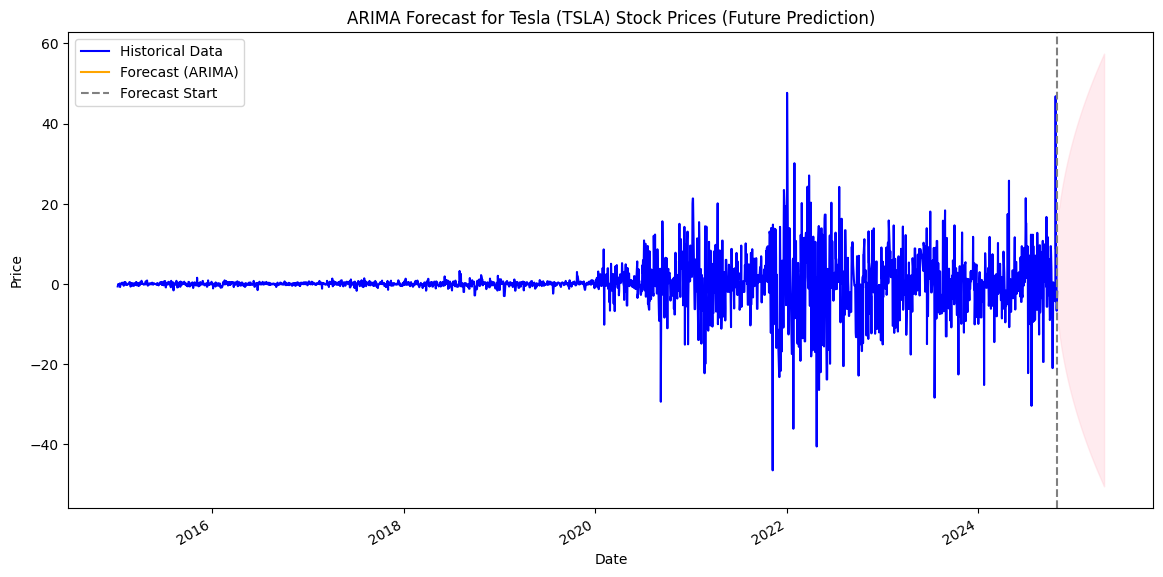

Forecast Summary:
Expected trend over the forecast duration: upward
Confidence intervals show the range of possible price fluctuations.

Volatility and Risk Analysis:
The forecast includes confidence intervals indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


In [42]:
arima_tsla = forecast_and_evaluate(train_data, model_choice="arima", asset_label="Tesla (TSLA)")

c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

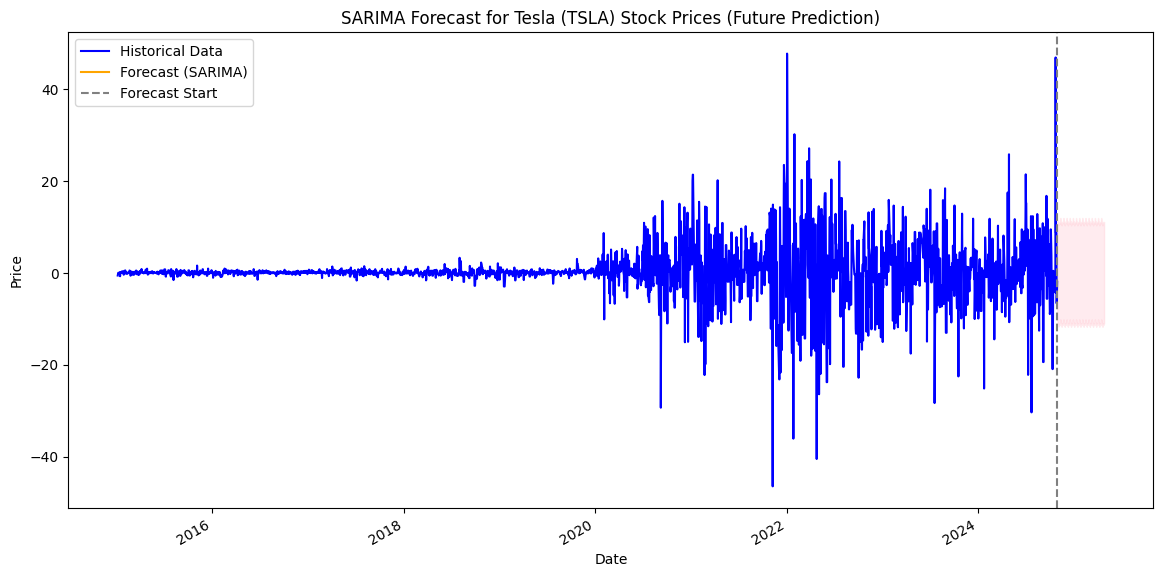

Forecast Summary:
Expected trend over the forecast duration: upward
Confidence intervals show the range of possible price fluctuations.

Volatility and Risk Analysis:
The forecast includes confidence intervals indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


In [43]:
sarima_tsla = forecast_and_evaluate(train_data, model_choice="sarima", asset_label="Tesla (TSLA)")

c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 11s 62ms/step - loss: 0.0382
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0038
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0040
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0034
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 0.0042
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0041
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0035
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0034
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0037
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 64ms/step - loss: 0.0034
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms

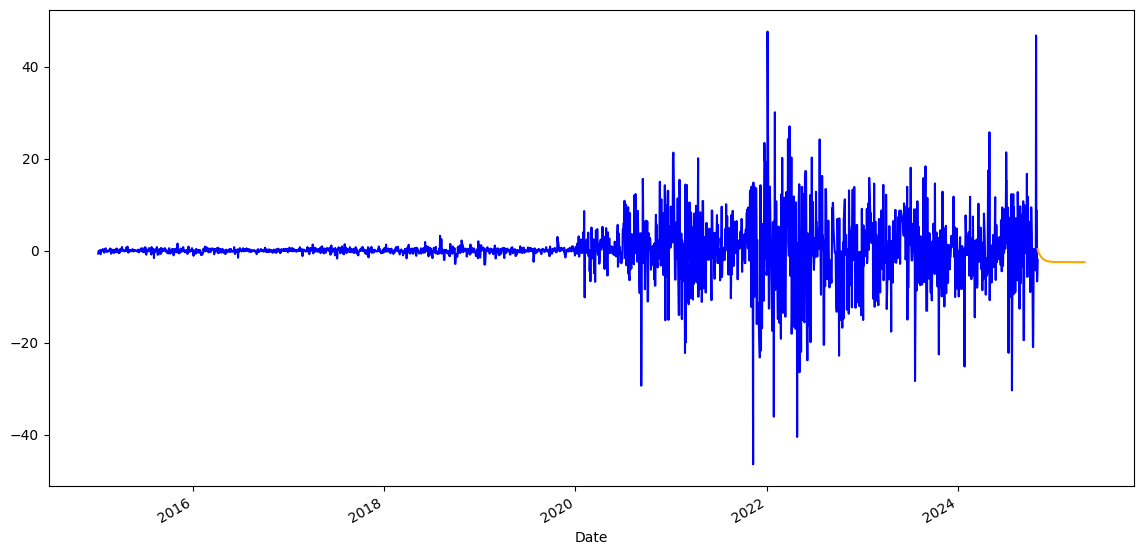

In [44]:
lstm_tsla = forecast_and_evaluate(train_data, model_choice="lstm", asset_label="Tesla (TSLA)")

c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

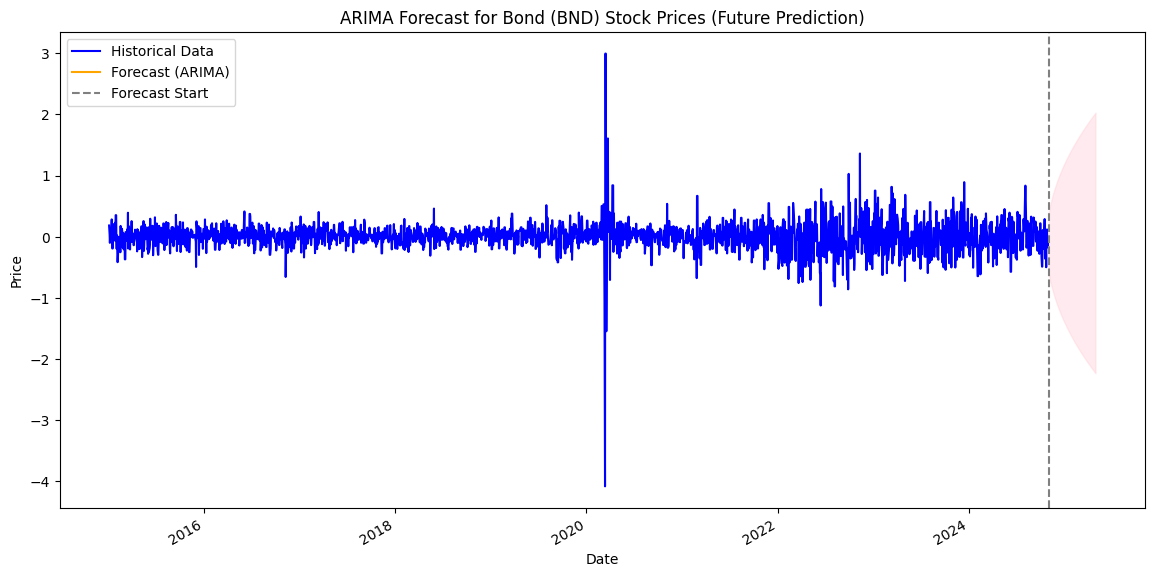

Forecast Summary:
Expected trend over the forecast duration: upward
Confidence intervals show the range of possible price fluctuations.

Volatility and Risk Analysis:
The forecast includes confidence intervals indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


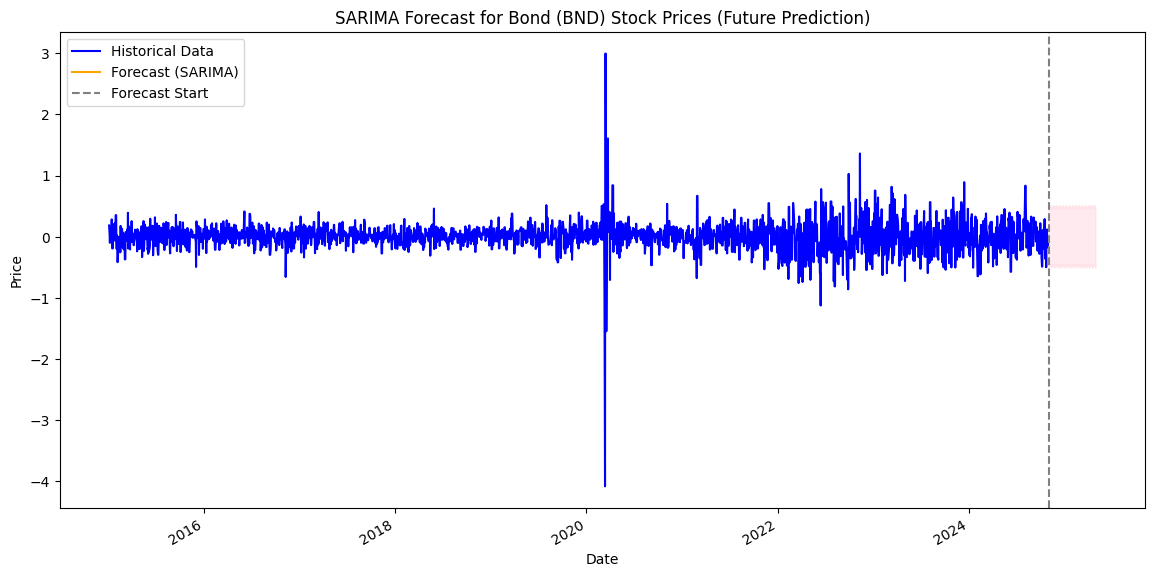

Forecast Summary:
Expected trend over the forecast duration: upward
Confidence intervals show the range of possible price fluctuations.

Volatility and Risk Analysis:
The forecast includes confidence intervals indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - loss: 0.0566
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0012
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0013
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0012
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0012
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 114ms/step - loss: 0.0014
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - loss: 0.0014
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 73ms/step - loss: 0.0012
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0017
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0015
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 647ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5

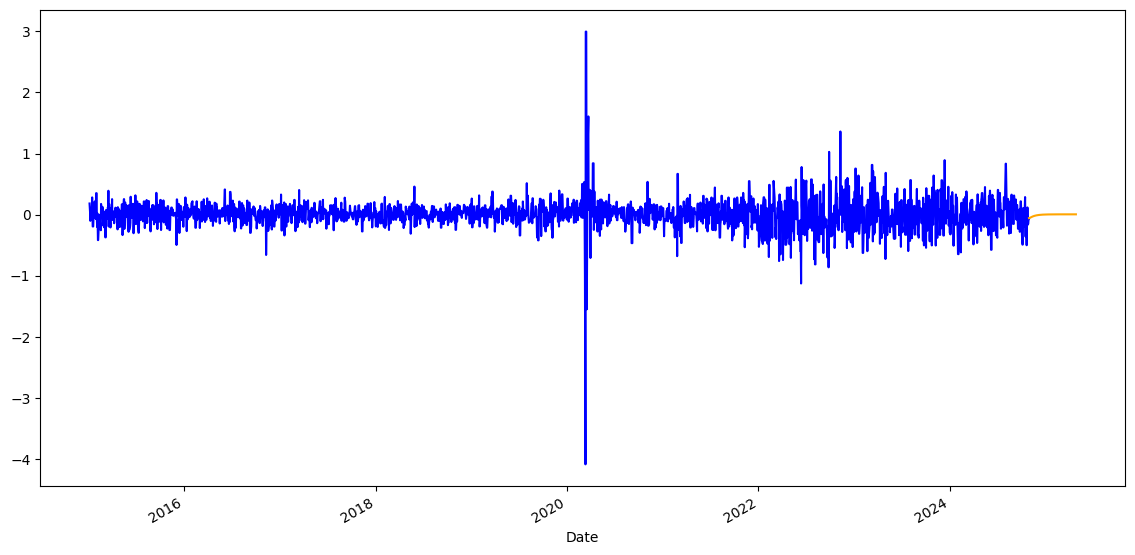

In [45]:
arima_bnd = forecast_and_evaluate(train_data_bnd, model_choice="arima", asset_label="Bond (BND)")
sarima_bnd = forecast_and_evaluate(train_data_bnd, model_choice="sarima", asset_label="Bond (BND)")
lstm_bnd = forecast_and_evaluate(train_data_bnd, model_choice="lstm", asset_label="Bond (BND)")

c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction resul

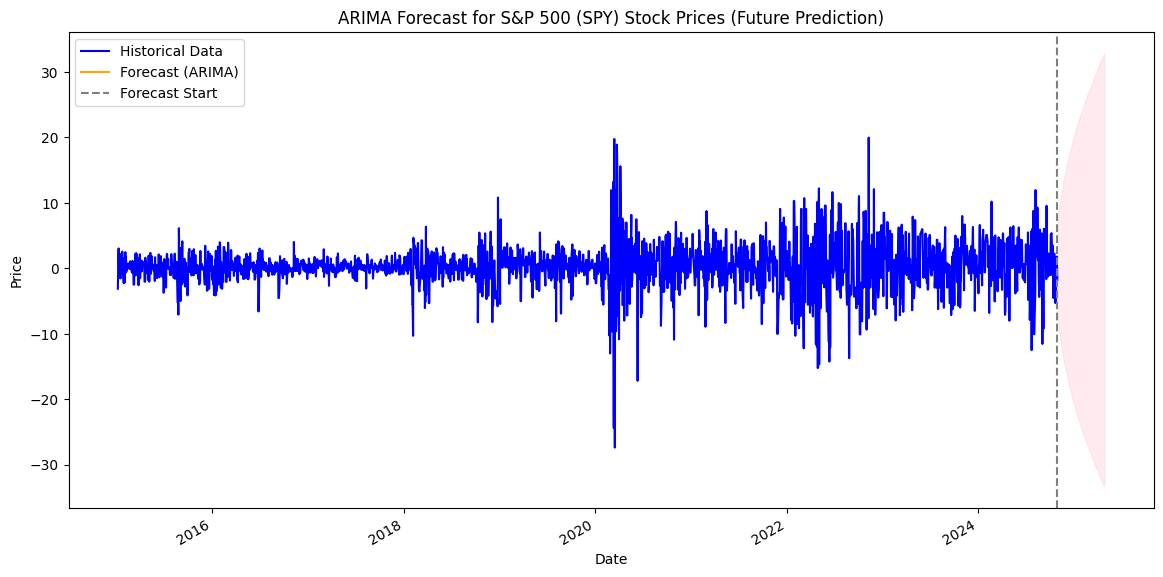

Forecast Summary:
Expected trend over the forecast duration: upward
Confidence intervals show the range of possible price fluctuations.

Volatility and Risk Analysis:
The forecast includes confidence intervals indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling th

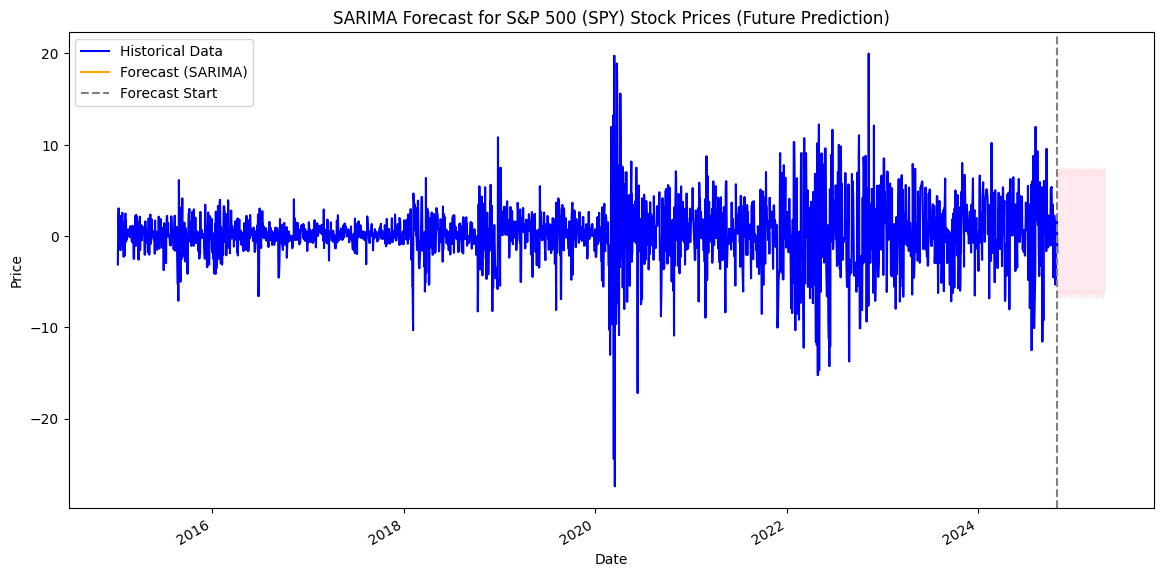

Forecast Summary:
Expected trend over the forecast duration: upward
Confidence intervals show the range of possible price fluctuations.

Volatility and Risk Analysis:
The forecast includes confidence intervals indicating expected price fluctuation ranges.

Market Opportunities and Risks:
Potential market opportunity due to an expected price increase.


c:\Users\Abdulaziz\Desktop\10 Academy\GMF\week11\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 12s 67ms/step - loss: 0.0521
Epoch 2/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0058
Epoch 3/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0058
Epoch 4/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0056
Epoch 5/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 0.0060
Epoch 6/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0057
Epoch 7/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0054
Epoch 8/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0051
Epoch 9/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 108ms/step - loss: 0.0053
Epoch 10/10
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step - loss: 0.0051
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms

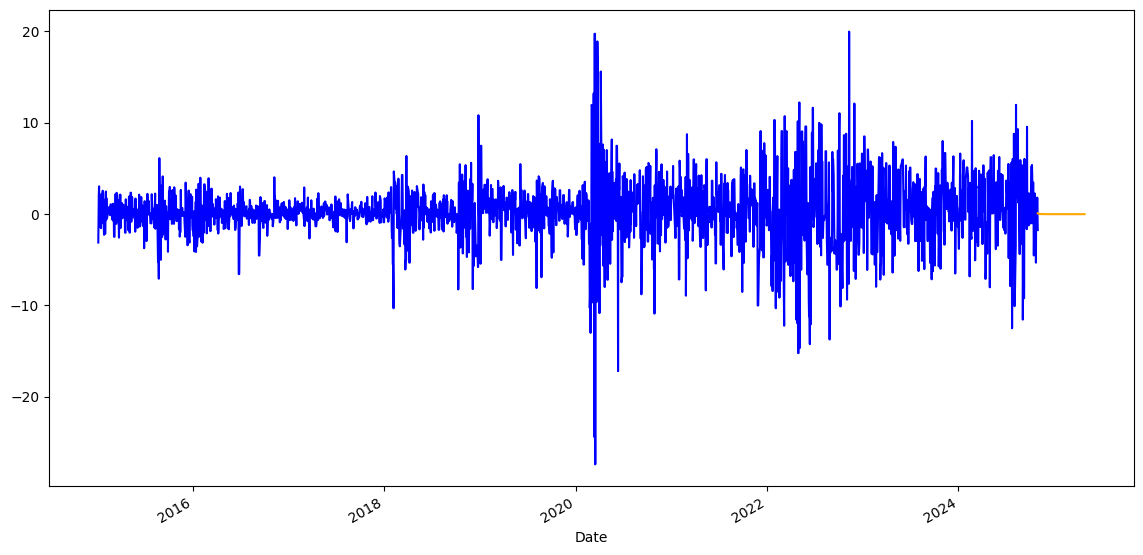

In [46]:
arima_spy = forecast_and_evaluate(train_data_spy, model_choice="arima", asset_label="S&P 500 (SPY)")
sarima_spy = forecast_and_evaluate(train_data_spy, model_choice="sarima", asset_label="S&P 500 (SPY)")
lstm_spy = forecast_and_evaluate(train_data_spy, model_choice="lstm", asset_label="S&P 500 (SPY)")

In [47]:
tsla_forecasted_prices = extract_forecast(lstm_tsla, "LSTM", "TSLA", train_data)
bnd_forecasted_prices = extract_forecast(lstm_bnd, "LSTM", "BND", train_data)
spy_forecasted_prices = extract_forecast(lstm_spy, "LSTM", "SPY", train_data)

LSTM Forecast for TSLA completed.
LSTM Forecast for BND completed.
LSTM Forecast for SPY completed.


In [48]:
forecast_df = pd.DataFrame({
    'TSLA': tsla_forecasted_prices,
    'BND': bnd_forecasted_prices,
    'SPY': spy_forecasted_prices
})
forecast_df.head()

,TSLA,BND,SPY
2024-10-30 00:00:00+00:00,0.353445,-0.054642,0.079676
2024-10-31 00:00:00+00:00,0.093250,-0.054188,0.058978
2024-11-01 00:00:00+00:00,-0.115891,-0.053016,0.044029
2024-11-02 00:00:00+00:00,-0.289320,-0.051342,0.033079
2024-11-03 00:00:00+00:00,-0.437735,-0.049347,0.024673


In [49]:
forecast_df = forecast_df.apply(pd.to_numeric, errors='coerce').dropna(axis=1, how='all')

In [50]:
forecast_df.head()

,TSLA,BND,SPY
2024-10-30 00:00:00+00:00,0.353445,-0.054642,0.079676
2024-10-31 00:00:00+00:00,0.093250,-0.054188,0.058978
2024-11-01 00:00:00+00:00,-0.115891,-0.053016,0.044029
2024-11-02 00:00:00+00:00,-0.289320,-0.051342,0.033079
2024-11-03 00:00:00+00:00,-0.437735,-0.049347,0.024673


<Figure size 1000x600 with 0 Axes>

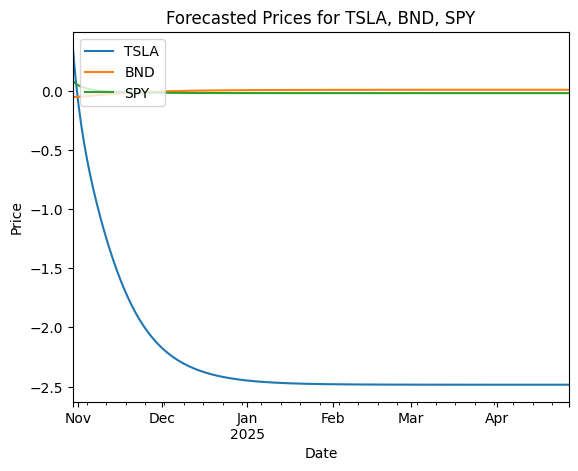

In [51]:
if not forecast_df.empty:
    plt.figure(figsize=(10, 6))
    forecast_df.plot()
    plt.title('Forecasted Prices for TSLA, BND, SPY')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc="upper left")
    plt.show()
else:
    print("There is no forecast data to visualize.")

In [52]:
daily_returns = forecast_df.pct_change().dropna()

In [53]:
annual_returns = daily_returns.mean() * 252

In [54]:
cov_matrix = daily_returns.cov() * 252

In [55]:
initial_weights = np.array([1/3, 1/3, 1/3])

In [56]:
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

In [57]:
bounds = tuple((0, 1) for _ in range(len(initial_weights)))

In [58]:
optimal_results = minimize(neg_sharpe_ratio, initial_weights, args=(annual_returns, cov_matrix),
                            method='SLSQP', bounds=bounds, constraints=constraints)

In [59]:
optimal_weights = optimal_results.x
opt_return, opt_volatility, opt_sharpe = portfolio_performance(optimal_weights, annual_returns, cov_matrix)

In [60]:
confidence_level = 0.95
var_tsla = np.percentile(daily_returns['TSLA'], (1 - confidence_level) * 100)

In [61]:
print("Optimal Weights:", optimal_weights)
print("Expected Portfolio:", opt_return)
print("Risk:", opt_volatility)
print("Ratio:", opt_sharpe)
print("95% Value at Risk for Tesla:", var_tsla)

Optimal Weights: [1.00000000e+00 1.33226763e-15 8.67361738e-16]
Expected Portfolio: 1.2183306217193182
Risk: 3.4267710027478033
Ratio: 0.3555331303849551
95% Value at Risk for Tesla: 0.0


<Figure size 1200x800 with 0 Axes>

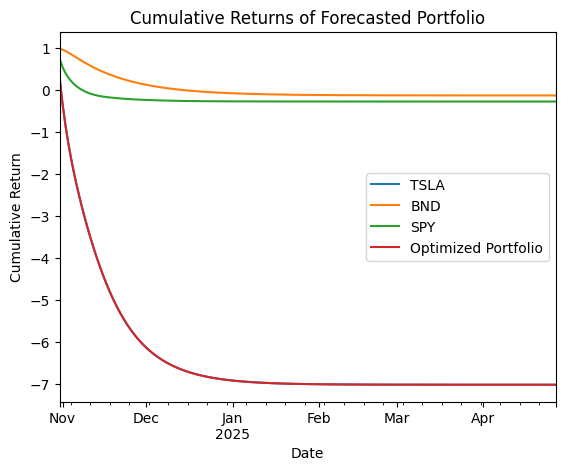

In [62]:
forecast_cumulative_returns = (daily_returns + 1).cumprod()
forecast_cumulative_returns['Portfolio'] = (daily_returns @ optimal_weights + 1).cumprod()

plt.figure(figsize=(12, 8))
forecast_cumulative_returns.plot()
plt.title('Cumulative Returns of Forecasted Portfolio')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(['TSLA', 'BND', 'SPY', 'Optimized Portfolio'])
plt.show()

In [63]:
print("Summary of Portfolio Optimization:")
print(" - Expected Annual Return:", opt_return)
print(" - Portfolio Volatility:", opt_volatility)
print(" - Sharpe Ratio:", opt_sharpe)
print(" - Optimal Allocation:", dict(zip(forecast_df.columns, optimal_weights)))
print(" - Value at Risk (95% Confidence) for TSLA:", var_tsla)

Summary of Portfolio Optimization:
 - Expected Annual Return: 1.2183306217193182
 - Portfolio Volatility: 3.4267710027478033
 - Sharpe Ratio: 0.3555331303849551
 - Optimal Allocation: {'TSLA': np.float64(0.9999999999999978), 'BND': np.float64(1.3322676295501878e-15), 'SPY': np.float64(8.673617379884035e-16)}
 - Value at Risk (95% Confidence) for TSLA: 0.0
